In [ ]:
#!git clone https://github.com/yanx27/Pointnet_Pointnet2_pytorch.git

Cloning into 'Pointnet_Pointnet2_pytorch'...


In [2]:
import os
import glob
import sys
import matplotlib.pyplot as plt
import numpy as np
import importlib
from importlib import reload

import data_utils.S3DISDataLoader as S3DISDataLoader
import train_semseg

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
# reload(S3DISDataLoader)

In [ ]:
import math

math.degrees(math.atan(0.2))

11.309932474020215

In [7]:
train_data_path = 'D:/PointNet/data/stanford_indoor3d/train'
valid_data_path = 'D:/PointNet/data/stanford_indoor3d/valid'
test_data_path = 'D:/PointNet/data/stanford_indoor3d/test'

# test_data_path = 'D:/PointNet/data/s3dis/stanford_indoor3d'
logs_path= 'D:/PointNet/log/sem_seg/pointnet_sem_seg/logs'

In [49]:
file_3= np.load('D:/Git/smpp-3D-model-comparator/data/RetainerBody_60-1810_1_1.npy')

In [16]:
def rename_files(data_path: str):
    
    data_list = glob.glob(os.path.join(data_path ,'*.npy'))
    for path in data_list:
        points = np.load(path)[:, 0:3]
        colors = np.load(path)[:, 3:6] * 255
        labels = np.reshape(np.load(path)[:, 9], (-1, 1))
        model_ = np.hstack((points, colors, labels))
        
        name1, name2, _, area_num, file_num_and_extension = path.split('\\')[-1].split('_')

        area_num = int(area_num) - 1

        #area_num = 6

        np.save(os.path.join(
            data_path, f'Area_{area_num}_{name1}_{name2}_{file_num_and_extension}'
            ), model_)
    return None

In [18]:
rename_files(valid_data_path)

In [ ]:
# %run python test_semseg.py --log_dir pointnet_sem_seg --visual --num_point 16384 --batch_size 8 --test_area 5

In [ ]:
# %run python train_semseg.py --model pointnet_sem_seg --test_area 5 --log_dir pointnet_sem_seg --batch_size 8 --epoch 96 --npoint 16384

In [10]:
TRAIN_DATASET = S3DISDataLoader.S3DISDataset(split='train', num_point=16384, data_root=train_data_path)

from collections import Counter

points = TRAIN_DATASET.__getitem__(0)[0]
labels = TRAIN_DATASET.__getitem__(0)[1]

sorted(Counter(labels).most_common())

  0%|          | 0/4493 [00:00<?, ?it/s]

100%|██████████| 4493/4493 [00:38<00:00, 118.05it/s]

[1.8178631 1.4548811 1.4681776 1.4492229 1.3156378 1.4798728 1.7324595
 1.        1.5252311 1.4234195 1.5821381 1.1558672 1.8935347 1.6720818
 1.3555744]
Totally 4493 samples in train set.


[(np.float64(0.0), 450),
 (np.float64(1.0), 968),
 (np.float64(2.0), 1039),
 (np.float64(3.0), 1027),
 (np.float64(4.0), 1551),
 (np.float64(5.0), 1075),
 (np.float64(6.0), 638),
 (np.float64(7.0), 3609),
 (np.float64(8.0), 975),
 (np.float64(9.0), 1029),
 (np.float64(10.0), 640),
 (np.float64(11.0), 1659),
 (np.float64(12.0), 370),
 (np.float64(13.0), 533),
 (np.float64(14.0), 821)]

In [23]:
sys.path.append("D:/PointNet/models")
MODEL = importlib.import_module("pointnet_sem_seg")

In [27]:
classifier = MODEL.get_model(15).cuda()

In [46]:
import argparse

parser = argparse.ArgumentParser('Model')
parser.add_argument('--model', type=str, default='pointnet_sem_seg',
    help='model name [default: pointnet_sem_seg]')
parser.add_argument('--batch_size', type=int, default=8,
    help='Batch Size during training [default: 16]')
parser.add_argument('--epoch', default=1, type=int,
    help='Epoch to run [default: 32]')
parser.add_argument('--learning_rate', default=0.001, type=float,
    help='Initial learning rate [default: 0.001]')
parser.add_argument('--gpu', type=str, default='0',
    help='GPU to use [default: GPU 0]')
parser.add_argument('--optimizer', type=str, default='Adam',
    help='Adam or SGD [default: Adam]')
parser.add_argument('--log_dir', type=str, default=None,
    help='Log path [default: None]')
parser.add_argument('--decay_rate', type=float, default=1e-4,
    help='Weight decay [default: 1e-4]')
parser.add_argument('--npoint', type=int, default=16384,
    help='Point Number [default: 4096]')
parser.add_argument('--step_size', type=int, default=10,
    help='Decay step for lr decay [default: every 10 epochs]')
parser.add_argument('--lr_decay', type=float, default=0.7,
    help='Decay rate for lr decay [default: 0.7]')
parser.add_argument('--test_area', type=int, default=5, 
    help='Which area to use for test, option: 1-6 [default: 5]')

# <-- Важно: вручную задаём список аргументов
args = parser.parse_args(args=[
    '--model', 'pointnet2',
    '--batch_size', '16',
    '--epoch', '50',
    '--learning_rate', '0.001',
    '--gpu', '0',
    '--optimizer', 'adam',
    '--log_dir', 'log_test',
    '--decay_rate', '0.0001',
    '--npoint', '4096',
    '--step_size', '20',
    '--lr_decay', '0.7',
    '--test_area', '5'
])

In [47]:
train_semseg.main(args)

usage: Model [-h] [--model MODEL] [--batch_size BATCH_SIZE] [--epoch EPOCH]
             [--learning_rate LEARNING_RATE] [--gpu GPU]
             [--optimizer OPTIMIZER] [--log_dir LOG_DIR]
             [--decay_rate DECAY_RATE] [--npoint NPOINT]
             [--step_size STEP_SIZE] [--lr_decay LR_DECAY]
             [--test_area TEST_AREA]
Model: error: unrecognized arguments: --f=c:\Users\kiselev\AppData\Roaming\jupyter\runtime\kernel-v3b51cf25641042bea1f6cef8dfaaa8fb64e1a8a9d.json


SystemExit: 2

In [19]:
import re
import matplotlib.pyplot as plt

# Путь к лог-файлу.
log_file = os.path.join(logs_path, 'pointnet_sem_seg_09062025.txt')

epochs = []
class_iou = {} # Значения IoU для каждого класса.

with open(log_file, 'r') as f:
    lines = f.readlines()

epoch_data = {} # Метрики для каждой эпохи.
current_class_ious = {} # Временный словарь для IoU по классам для одной эпохи.

for line in lines:
    # Поиск строки вида Epoch 1 (1/32) и извлечение номера эпохи.
    if match := re.search(r'Epoch (\d+) \(\d+/\d+\)', line):
        if epoch_data:
            # Сохранение данных прошлой эпохи.
            epoch_data['class_ious'] = current_class_ious
            epochs.append(epoch_data)
            # Очистка словарей для новой эпохи.
            epoch_data = {}
            current_class_ious = {}
        # Запись новой эпохи.
        epoch_data['epoch'] = int(match.group(1))

    if match := re.search(r'Training mean loss: ([\d.]+)', line):
        epoch_data['train_loss'] = float(match.group(1))
    elif match := re.search(r'Training accuracy: ([\d.]+)', line):
        epoch_data['train_acc'] = float(match.group(1))
    elif match := re.search(r'Eval mean loss: ([\d.]+)', line):
        epoch_data['eval_loss'] = float(match.group(1))
    elif match := re.search(r'Eval accuracy: ([\d.]+)', line):
        epoch_data['eval_acc'] = float(match.group(1))
    elif match := re.search(r'Eval avg class IoU: ([\d.]+)', line):
        epoch_data['eval_avg_iou'] = float(match.group(1))
    elif match := re.search(r'Eval avg class acc: ([\d.]+)', line):
        epoch_data['eval_avg_class_acc'] = float(match.group(1))
    
    elif match := re.search(r'class (\d+)\s+weight: [\d.]+, IoU: ([\d.]+)', line):
        cls_id, iou = int(match.group(1)), float(match.group(2))
        current_class_ious[cls_id] = iou
    elif match := re.search(r'Best mIoU: ([\d.]+)', line):
        epoch_data['best_mIoU'] = float(match.group(1))

# Добавить последнюю эпоху
if epoch_data:
    epoch_data['class_ious'] = current_class_ious
    epochs.append(epoch_data)

In [20]:
epochs

[{'epoch': 1, 'class_ious': {}},
 {'epoch': 1,
  'train_loss': 0.854172,
  'train_acc': 0.682939,
  'eval_loss': 0.796854,
  'eval_acc': 0.711694,
  'eval_avg_class_acc': 0.668882,
  'eval_avg_iou': 0.506377,
  'best_mIoU': 0.506377,
  'class_ious': {0: 0.559}},
 {'epoch': 2, 'class_ious': {}},
 {'epoch': 1,
  'train_loss': 0.850007,
  'train_acc': 0.685258,
  'eval_loss': 0.465439,
  'eval_acc': 0.822714,
  'eval_avg_class_acc': 0.78275,
  'eval_avg_iou': 0.65801,
  'best_mIoU': 0.65801,
  'class_ious': {0: 0.64}},
 {'epoch': 2,
  'train_loss': 0.536205,
  'train_acc': 0.781251,
  'eval_loss': 0.700061,
  'eval_acc': 0.70604,
  'eval_avg_class_acc': 0.687102,
  'eval_avg_iou': 0.505403,
  'best_mIoU': 0.65801,
  'class_ious': {0: 0.519}},
 {'epoch': 3,
  'train_loss': 0.486147,
  'train_acc': 0.801743,
  'eval_loss': 0.389928,
  'eval_acc': 0.838909,
  'eval_avg_class_acc': 0.835657,
  'eval_avg_iou': 0.691877,
  'best_mIoU': 0.691877,
  'class_ious': {0: 0.716}},
 {'epoch': 4,
  'tra

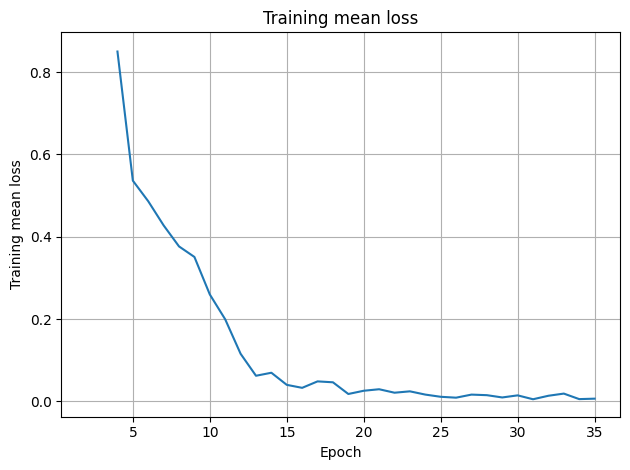

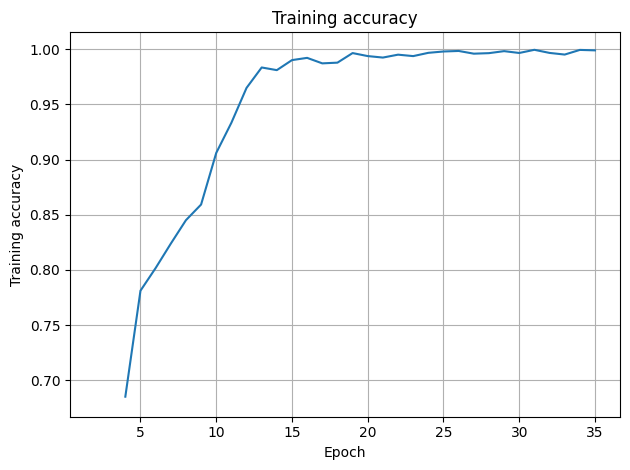

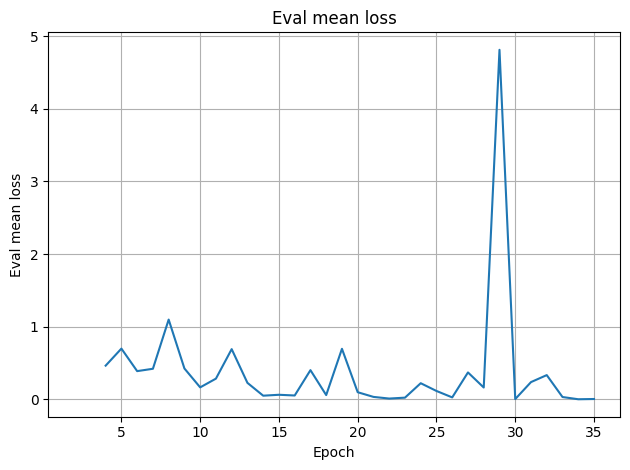

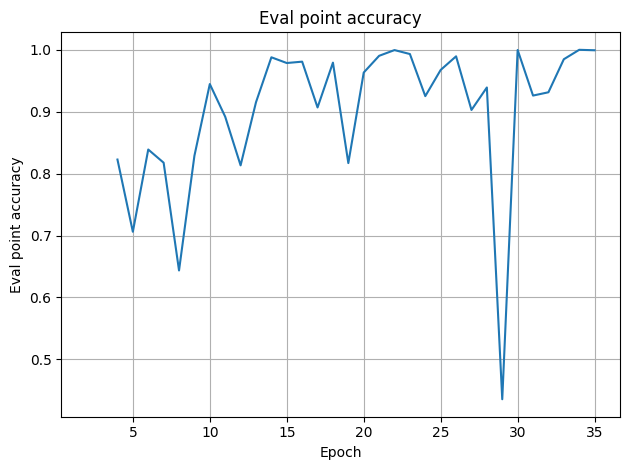

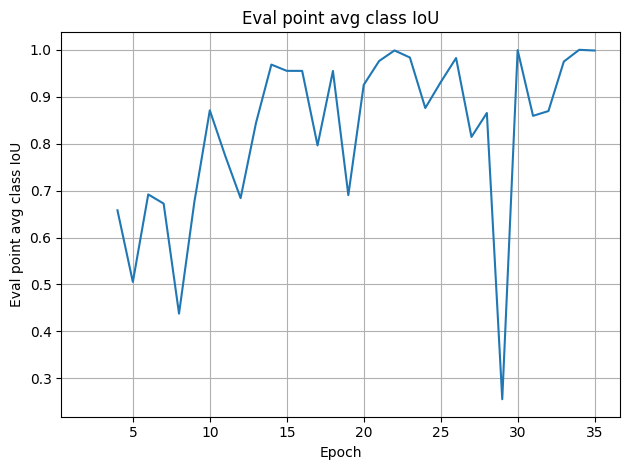

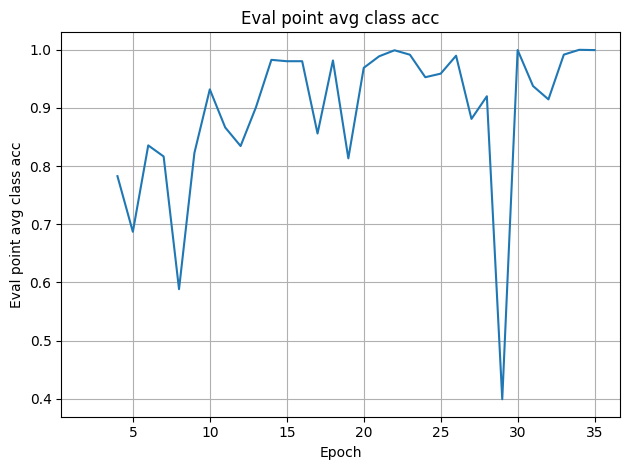

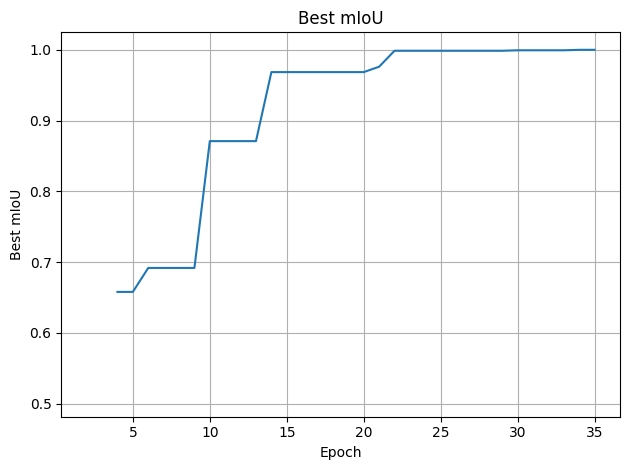

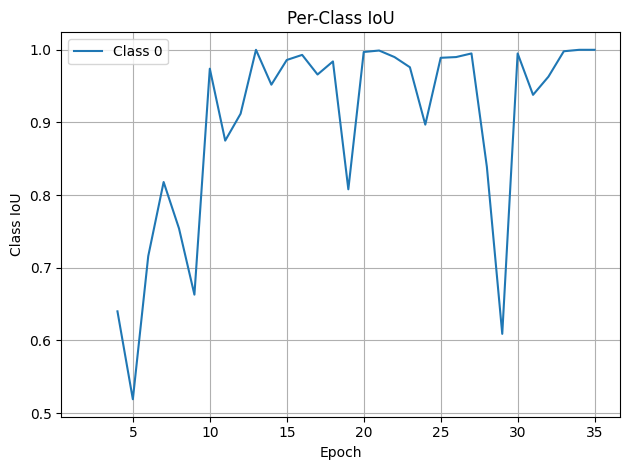

In [21]:
# --- Построение графиков ---
def plot_metric(metric_name: str, ylabel: str):
    values = [epoch.get(metric_name, None) for epoch in epochs]
    plt.plot(range(1, len(values) + 1), values)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_metric('train_loss', 'Training mean loss')
plot_metric('train_acc', 'Training accuracy')
plot_metric('eval_loss', 'Eval mean loss')
plot_metric('eval_acc', 'Eval point accuracy')
plot_metric('eval_avg_iou', 'Eval point avg class IoU')
plot_metric('eval_avg_class_acc', 'Eval point avg class acc')
plot_metric('best_mIoU', 'Best mIoU')

# --- IoU по классам ---
all_classes = sorted(set(k for e in epochs for k in e['class_ious'].keys()))
for cls_id in all_classes:
    cls_ious = [e['class_ious'].get(cls_id, None) for e in epochs]
    plt.plot(range(1, len(cls_ious) + 1), cls_ious, label=f'Class {cls_id}')

plt.xlabel('Epoch')
plt.ylabel('Class IoU')
plt.title('Per-Class IoU')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()